# Лабораторная работа №2
# Препроцессинг данных

Препроцессинг данных включает в себя широкий круг методов для очистки, выбора и преобразования данных с целью улучшения качества последующего интеллектуального анализа данных. 

Программные средства для препроцессинга данных имеются как в библиотеке Pandas, так и основной библиотеке машинного обучения scikit-learn (sklearn).

## Загрузка данных из удаленного файла

Считаем набор данных “Ирисы” из репозитария UCI (http://archive.ics.uci.edu/) при помощи библиотеки `urllib.request`, выведем данные на экран и проанализируем размерность данных (количество записей и признаков):

In [1]:
import urllib.request

# чтение данных из репозитария UCI
target_url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/iris/iris.data"

data = urllib.request.urlopen(target_url) # объект типа 'HTTPResponse'

print('##### Набор данных Ирисы #####')
xList = []
for line in data:    
    row = line.strip().decode().split(",") # сплит по запятой
    if len(row) > 1:
        xList.append(row)

print("Число строк в данных = ", len(xList))
print("Число столбцов в данных = ", len(xList[1]))
xList

##### Набор данных Ирисы #####
Число строк в данных =  150
Число столбцов в данных =  5


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

Считаем набор данных “Ирисы” из репозитария UCI при помощи функции `genfromtxt()` библиотеки NumPy и рассчитаем средние значения признаков, матрицы ковариаций и корреляций признаков:

In [2]:
from urllib.request import urlopen
from contextlib import closing
import numpy as np

url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

with closing(urlopen(url)) as u, open("iris.csv", "w") as f: # копируем файл на диск
    f.write(u.read().decode())

data = np.genfromtxt( "iris.csv", delimiter=",", usecols=(0,1,2,3), dtype=float ) 
target = np.genfromtxt( "iris.csv", delimiter=",", usecols=(4), dtype=str )

iris_mean = np.mean( data, axis=0 )
iris_cov = np.cov( data.T )
iris_corr = np.corrcoef( data.T ) 

print( "*** Средние значения:\n", iris_mean )
print( "*** Матрица ковариаций:\n", iris_cov )
print( "*** Матрица корреляций:\n", iris_corr )

*** Средние значения:
 [5.84333333 3.054      3.75866667 1.19866667]
*** Матрица ковариаций:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
*** Матрица корреляций:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [3]:
target

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

Считаем теперь набор данных “Ирисы” при помощи пакета Pandas:

In [4]:
import pandas as pd

url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# считываем данные в объект DataFrame
my_data = pd.read_csv( url, header=None, prefix="V" )

print( "\n*** Начало данных:\n", my_data.head() ) # начальные данные
print( "\n*** Конец данных:\n",  my_data.tail() ) # конечные данные

summary = my_data.describe()                      # сводка данных 
print( "\n*** Сводка данных:\n", summary)


*** Начало данных:
     V0   V1   V2   V3           V4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

*** Конец данных:
       V0   V1   V2   V3              V4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

*** Сводка данных:
                V0          V1          V2          V3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


## Качество наборов данных

Плохое качество данных оказывает негативное воздействие на процесс анализа данных. Наиболее часто встречающиеся проблемы включают шум, выбросы, отсутствующие значения и дублирующиеся данные. 

Начнем с примера набора данных из репозитария UCI с информацией о пациентах с раком груди. 

In [5]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                   'breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)        # удаляем ненужный столбец
print('Число записей = %d' % (data.shape[0]))
print('Число признаков = %d' % (data.shape[1]))
data.head()

Число записей = 699
Число признаков = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Отсутствующие (пропущенные) значения

Достаточно часто в записи отсутствуют одно или несколько значений признаков. Иногда не хватает информации, а иногда некоторые значения не подходят для данных. Существуют различные подходы для работы с отсутствующими значениями. 

В наборах данных репозитария UCI отсутствующие значения часто кодируются как символьная строка '?'. Первая задача состоит в конвертации отсутствующих значений в значение NaNs (NaN - Not a Number). Далее можно подсчитать количество отсутствующих значений в каждом столбце набора данных.

In [6]:
import numpy as np # для использования np.NaN

data = data.replace('?',np.NaN) # заменить '?' на np.NaN

print('Число записей = %d' % (data.shape[0]))
print('Число признаков = %d' % (data.shape[1]))

print('Число отсутствующих значений:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Число записей = 699
Число признаков = 10
Число отсутствующих значений:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Среди всех столбцов только столбец 'Bare Nuclei' содержит отсутствующие значения. Отсутствующие значения в столбце 'Bare Nuclei' могут быть заменены на медиану столбца при помощи метода `fillna()` (значения до и после замены показаны на подмножестве записей).

In [7]:
data2 = data['Bare Nuclei']

print('До замены отсутствующих значений:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nПосле замены отсутствующих значений:')
print(data2[20:25])

До замены отсутствующих значений:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

После замены отсутствующих значений:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


In [8]:
data2

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

Вместо замены отсутствующих значений можно удалить записи (строки), содержащие отсутствующие значения. Для этого можно использовать метод `dropna()`:

In [9]:
print('Число записей в исходных данных = %d' % (data.shape[0]))

data2 = data.dropna()
print('Число записей после удаления отсутствующих значений = %d' % (data2.shape[0]))

Число записей в исходных данных = 699
Число записей после удаления отсутствующих значений = 683


### Выбросы

Выбросами (outliers) называются записи (строки) с характеристиками, которые существенно отличаются от характеристик остальных записей набора данных. 

Ниже мы изобразим диаграммы размаха (boxplot) столбцов, чтобы найти столбцы таблицы, которые содержат выбросы. Так как столбец 'Bare Nuclei' идентифицирован Pandas как строковый (из-за отсутствующих значений, представленных строками '?'), нам придется конвертировать столбец в числовые значения для того, чтобы использовать диаграмму размаха. В противном случае столбец не будет отображаться на рисунке.

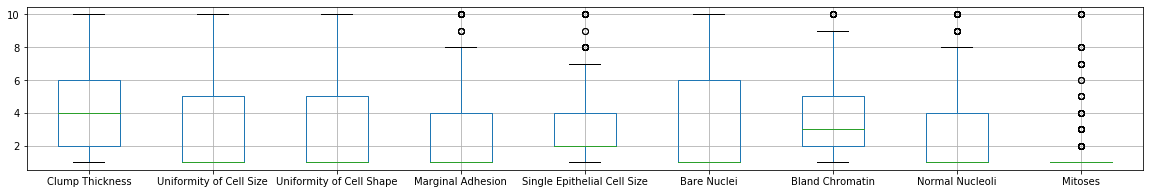

In [10]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

Диаграммы размаха показывают, что только пять столбцов (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, Mitoses) содержат ненормально большие значения. 

Чтобы убрать выбросы, можно посчитать стандартизованную оценку (Z-score) для каждого признака и убрать записи, содержащие атрибуты с ненормально высоким или низким Z-score (например, $Z>3$ или $Z<-3$). Для нормального распределения вероятность отклонения случайной величины от своего математического ожидания более чем на три стандартных отклонения практически равна нулю (правило трех сигм).

Следующий код показывает результаты стандартизации стоблцов с данными. Отсутствующие значения (NaN) не затрагиваются процессом стандартизации. 

In [11]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


Следующий код показывает результаты удаления строк, для которых $Z>3$ или $Z<-3$. Число 9 соответствует количеству столбцов в Z.

In [12]:
print('Число записей до удаления выбросов = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z >= -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Число записей после удаления выбросов = %d' % (Z2.shape[0]))

Число записей до удаления выбросов = 699
Число записей после удаления выбросов = 632


### Дублирующиеся данные

Некоторые наборы данных, особенно полученные слиянием данных из нескольких источников, могут содержать дублирующиеся записи. 

In [13]:
dups = data.duplicated()
print('Число дублирующихся записей = %d' % (dups.sum()))
data.loc[[11,28]]

Число дублирующихся записей = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


Метод `duplicated()` возвращает булевский массив, который показывает является ли запись дубликатом какой-либо предыдущей записи в таблице. Результат означает, что в наборе данных пациентов с раком груди имеется 236 дублирующихся записей. Например, строка с индексом 11 имеет те же значения признаков, что и строка с индексом 28. 

Хотя дублирующиеся записи могут соответствовать данным различных пациентов, допустим, что дублирующиеся записи  соответствуют одному и тому же пациенту и удалим их:

In [14]:
print('Число записей до удаления дубликатов = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Число записей после удаления дубликатов = %d' % (data2.shape[0]))

Число записей до удаления дубликатов = 699
Число записей после удаления дубликатов = 463


## Трансформация (преобразование) данных

### Нормализация признака

Стандартизацией случайной величины $X$ называют ее линейное преобразование, приводящее к случайной величине с математическим ожиданием 0 и стандартным отклонением 1:

$\tilde{X}=\frac{X-\mathbb{E}\left[X\right]}{\sqrt{\mathbb{V}\left[X\right]}},$

где $\mathbb{E}$ – операция вычисления математического ожидания, $\mathbb{V}$ – операция вычисления дисперсии. 

Стандартизация набора данных является существенным условием для применения многих алгоритмов машинного обучения, а именно, алгоритмы дают приемлемый результат, только если отдельные признаки распределены примерно как стандартные нормальные величины (с нулевым матожиданием и единичной дисперсией).

Для стандартизации признаков набора данных может быть использована функция `scale()` из модуля `preprocessing`:

In [15]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


Стандартизованный набор данных имеет признаки с нулевыми средними и единичной дисперсией:

In [16]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


Также модуль preprocessing содержит класс `StandardScaler`, который позволяет сохранить математическое ожидание и стандартное отклонение обучающей выборки и затем применять то же преобразование к другим выборкам. 

Альтернативным вариантом нормализации является масштабирование признака между заданным минимальным и максимальным значениями (нормализация). Этот эффект может быть достигнут при помощи функций `MinMaxScaler()` или `MaxAbsScaler()`: 

In [17]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Функция `MaxAbsScaler()` используется аналогично, но масштабирует данные в диапазон $\left[-1,\,1\right]$.

### Агрегирование данных

Агрегирование данных – это процесс преобразования данных с высокой степенью детализации к более обобщенному представлению, когда значения двух и более объектов комбинируются в один объект. 

Целями агрегирования являются:

1. уменьшение размера обрабатываемых данных

2. изменение (укрупнение) масштабов анализа 

3. улучшение стабильности данных

В примере ниже мы используем дневные временные ряды с данными об атмосферных осадках от метеорологической станции. Временные ряды с дневными данными об осадках будут сравниваться с месячными значениями. 

Программный код загружает дневные данные об осадках и рисует график значений.

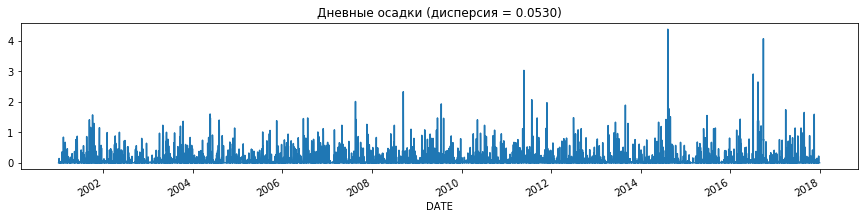

In [18]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Дневные осадки (дисперсия = %.4f)' % (daily.var()));

Дневные данные об осадках выглядят весьма хаотическими и изменяются существенно от одного момента времени к другому. Дневные данные могут быть сгрупированы и агрегированы по месяцам, чтобы получить общие месячные значения осадков. Полученные в результате агрегирования данные выглядят более гладкими по сравнению с дневными данными.

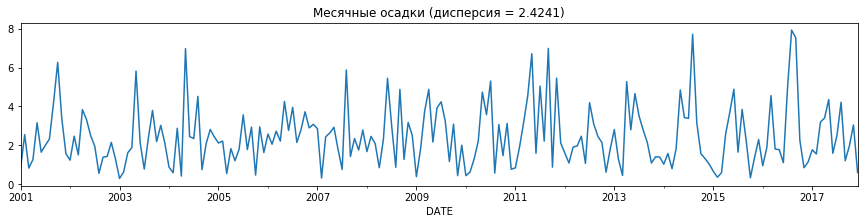

In [19]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Месячные осадки (дисперсия = %.4f)' % (monthly.var()));

В примере ниже дневные данные сгруппированы и агрегированы по годам.

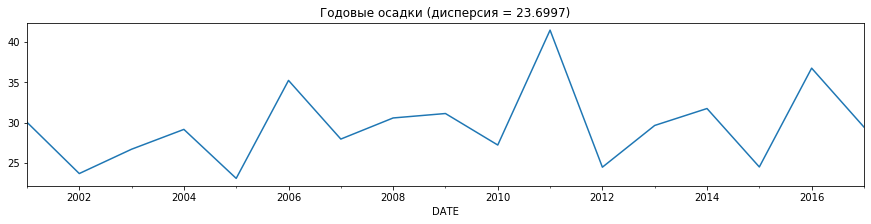

In [20]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Годовые осадки (дисперсия = %.4f)' % (annual.var()));

### Семплирование данных

Семплирование (от англ. sample — выборка), или методы управления выборкой данных, – это подход, направленный на:

1. сокращение объема данных для анализа данных и масштабирования алгоритмов для приложений с большими данными

2. количественную оценку неопределенностей из-за различного распределения данных

Существуют различные методы выборки данных, такие как выборка без замены, когда каждый выбранный экземпляр удаляется из набора данных, и выборка с заменой, где каждый выбранный экземпляр не удаляется, что позволяет выбирать его более одного раза.

В примере ниже мы применим выборку с заменой и без замены с набору данных пациентов с раком груди.

Выведем первые пять записей набора:

In [21]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Далее данные для выборки размера 3 (без замены) выбираются случайным образом из исходных данных.

In [22]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
671,3,2,1,2,2,1,3,1,1,2
205,5,10,10,9,6,10,7,10,5,4
348,3,4,4,10,5,1,3,3,1,4


В следующем примере мы случайным образом выбираем 1% данных (без замены) и выводим выбранные записи. Параметр `random_state` задает начальное значение для генератора случайных чисел. 

In [23]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


Наконец, выполним выборку с заменой размером, равным 1% всех данных. Можно увидеть повторяющиеся записи в выборке, если увеличить ее размеры.

In [24]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


### Дискретизация данных

Дискретизация – это этап препроцессинга, который часто используется при преобразовании непрерывного признака в категориальный. 

Пример ниже иллюстрирует два простых, но часто применяемых метода дискретизации (равной ширины,  равных частот) для признака 'Clump Thickness' набора данных пациентов с раком груди.

Вначале нарисуем гистограмму, которая показывает распределение значений признака. Метод `value_counts()` также может быть использован, чтобы подсчитать частоты каждого значения признака.

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

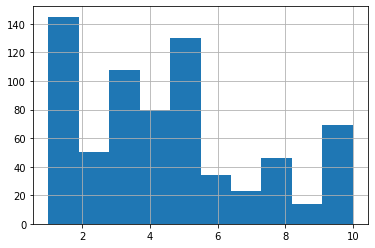

In [25]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

При использовании метода равной ширины можно задействовать функцию `cut()`, чтобы дискретизировать признак в 4 бина, имеющих равную ширину. Метод `value_counts()` может быть использован для определения числа записей в каждом из бинов.

In [26]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

При использовании метода равных частот можно задействовать функцию `qcut()` для разделения значений признака на 4 бина, имеющих примерно равное число записей. 

In [27]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

Дискретизация также возможна при помощи средств библиотеки scikit-learn.

### Кодирование категориальных признаков

В большинстве наборов данных присутствуют категориальные признаки, которые содержат значения в текстовом формате. Примерами являются цвета (“Red”, “Green”, “Yellow”, “Blue”), размеры (“Small”, “Medium”, “Large”, “Extra Large”), географические обозначения (страны, города и т.п.). Независимо от назначения категориальных признаков возникает вопрос, как использовать категориальные признаки при анализе данных. Многие алгоритмы машинного обучения поддерживают категориальные значения без необходимости каких-либо манипуляций с данными, однако есть и такие алгоритмы, которые требуют преобразования текстовых значений в числовые для дальнейшей обработки.

#### Набор данных

Рассмотрим набор данных Automobile из репозитария UCI, содержащий как категориальные, так и непрерывные признаки. 

Импортируем данные, выполняя попутно обработку пропущенных значений:

In [28]:
import pandas as pd
import numpy as np
# определяем метки столбцов
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight",
    "engine_type", "num_cylinders", "engine_size", "fuel_system",
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"]
# считываем CSV файл и конвертируем значения "?" в NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Чтобы понять, с какими типами данным мы имеем дело, рассмотрим свойство

In [29]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Так как нас интересуют только категориальные признаки, оставим в наборе столбцы с типом `“object”`. Pandas содержит удобный метод `select_dtypes()`, который можно использовать, чтобы оставить в наборе только столбцы с типом `“object”` (категориальные признаки):

In [30]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Построенный набор содержит несколько строк с пропущенными значениями, которые нужно заполнить:

In [31]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


В наборе наиболее часто встречается значение "four" (4 двери):

In [32]:
obj_df["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

Для простоты заполним пропущенные значения этим значением:

In [33]:
obj_df = obj_df.fillna({"num_doors": "four"})
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system


Теперь набор не содержит пропущенных значений и мы можем приступить к кодированию категориальных значений.

#### Замена значений признаков

В двух столбцах набора данных текстовые значения представляют собой числа, а именно, число цилиндров в двигателе и число дверей в автомобиле. 

Признак "num_cylinders" принимает 7 значений, которые легко преобразуются в целые числа:

In [34]:
obj_df["num_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

Метод `replace()` из Pandas имеет множество опций, в частности, опцию словаря, содержащего названия столбцов и словари для отображения старых значений в новые значения.

Словарь для преобразования признаков "num_doors" и "num_cylinders" в числовые значения задается следующим образом:

In [35]:
cleanup_nums = {"num_doors": {"four": 4, "two": 2},
    "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
    "two": 2, "twelve": 12, "three":3 }}

Для преобразования признаков в числовые значения выполним код: 

In [36]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


Pandas автоматически преобразует тип признаков в числовой (int64):

In [37]:
obj_df.dtypes

make               object
fuel_type          object
aspiration         object
num_doors           int64
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

Описанный подход работает в тех случаях, когда имеется понятный способ интерпретации текстовых значений как числовых.

#### Кодирование меток

Кодирование меток (label encoding) – это способ конвертации значений в столбцах в числа.

Например, столбец body_style содержит 5 различных значений. Можно закодировать их так: 

    convertible -> 0  
    hardtop -> 1  
    hatchback -> 2  
    sedan -> 3  
    wagon -> 4  

Можно использовать Pandas, чтобы преобразовать столбец в категорию (категория – это тип данных в Pandas, принимающий несколько значений), а потом использовать значения категории для кодирования меток:

In [38]:
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors             int64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

Далее можно присвоить закодированные значения признака новому столбцу "body_style_cat" используя свойство `cat.codes`:

In [39]:
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df[['body_style','body_style_cat']].head()

,body_style,body_style_cat
0,convertible,0
1,convertible,0
2,hatchback,2
3,sedan,3
4,sedan,3


Особенностью этого подхода является то, что появляется возможность использовать преимущества категорий Pandas (компактность данных, возможность упорядочения, поддержка визуализации), при этом категории могут быть легко конвертированы в числовые значения для дальнейшего анализа.

#### Прямое кодирование (One Hot Encoding)

Кодирование меток имеет преимущество в виде простоты реализации и недостаток, состоящий в том, что числовое значение может быть некорректно интерпретировано алгоритмами машинного обучения. Например, значение 0, очевидно, меньше значения 2, но соответствует ли эта зависимость реальной ситуации для текстовых значений? 

Альтернативный подход (прямое кодирование) состоит в том, чтобы конвертировать каждую категорию в новый столбец, принимающий значения 1 или 0 (True/False). Преимуществом этого подхода является то, что между категориальными значениями не устанавливаются несуществующие связи, а недостатком – что в наборе данных появляются дополнительные столбцы. 

Pandas поддерживает этот подход в функции `get_dummies()`, которая создает новые столбцы вида “столбец_значение”.

Рассмотрим пример для столбца drive_wheels со значениями 4wd , fwd, rwd. Используя `get_dummies()` мы конвертируем этот столбец в три столбца со значениями 1 или 0, соответствующими правильному значению исходного признака (столбца):

In [40]:
pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0


Столбец "drive_wheels" пропал, при этом новый набор данных содержит три новых столбца:

• drive_wheels_4wd  
• drive_wheels_rwd  
• drive_wheels_fwd  

В функцию `get_dummies()` можно передать несколько столбцов с категориальными признаками, а также передать префиксы для именования новых столбцов с целью упростить последующий анализ данных:

In [41]:
pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()

,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
1,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
2,alfa-romero,gas,std,2,front,ohcv,6,mpfi,2,0,0,1,0,0,0,0,1
3,audi,gas,std,4,front,ohc,4,mpfi,3,0,0,0,1,0,0,1,0
4,audi,gas,std,4,front,ohc,5,mpfi,3,0,0,0,1,0,1,0,0


Прямое кодирование является очень полезным инструментом, однако может приводить к резкому увеличению числа столбцов в наборе, если категориальные признаки имеют большое число различных значений. 

#### Двоичное кодирование, управляемое пользователем 

В зависимости от особенностей набора данных можно использовать различные комбинации кодирования меток и прямого кодирования, которые в наибольшей степени соответствуют целям дальнейшего анализа. 

Для иллюстрации двоичного кодирования, управляемого пользователем (custom binary encoding), рассмотрим следующий пример. В наборе данных имеется столбец engine_type (тип двигателя), который содержит несколько различных значений:

In [42]:
obj_df["engine_type"].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

Допустим, что требуется выделить в отдельную группу все двигатели с верхней камерой (Overhead Cam или OHC). Другими словами, различные версии OHC эквивалентны для анализа. В это случае можно использовать свойство `str` и функцию `np.where`, чтобы создать новый столбец как индикатор того, что двигатель автомобиля имеет тип OHC.

In [43]:
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)
obj_df["OHC_Code"].value_counts()

1    189
0     16
Name: OHC_Code, dtype: int64

В результате получаем набор данных, включающий столбец OHC_Code (показываем в наборе только три столбца):

In [44]:
obj_df[["make", "engine_type", "OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


Данный подход является по-настоящему полезным, если имеется возможность консолидировать бинарные значения (да/нет) в новом столбце. 

#### Возможности кодирования в библиотеке Scikit-Learn

Библиотека scikit-learn также содержит функцонал для кодирования текстовых признаков.

Например, чтобы кодировать метки для производителей автомобиля, используем объект `LabelEncoder` и метод `fit_transform()` для столбца с данными:

In [45]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
obj_df[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


Scikit-learn также поддерживает бинарное кодирование при помощи объекта `LabelBinarizer`. Можно использовать процедуру, аналогичную приведенной выше, чтобы преобразовать данные, но требуются некоторые дополнительные шаги.

In [46]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


На следующем шаге нужно включить эти данные в исходный набор данных.

## Отбор признаков 

Набор признаков, используемых для обучения модели, оказывает значительное влияние на качество результатов. Присутствие в наборе данных малоинформативных признаков приводит к снижению точности многих моделей, особенно моделей регрессии.

Отбор признаков (feature selection) – это процесс выбора признаков, обеспечивающий более высокое качество модели машинного обучения.

Отбор признаков перед построением модели обеспечивает следующие преимущества:

• Уменьшение переобучения. Чем меньше избыточных данных, тем меньше возможностей для модели принимать решения на основе «шума».

• Повышение точности. Чем меньше противоречивых данных, тем выше точность.

• Сокращение времени обучения. Чем меньше данных, тем быстрее обучается модель.

Будем работать с набором данных, содержащим информацию о качество вина. 

### Удаление признаков с низкой дисперсией

Простейшим подходом к отбору признаков является исключение признаков с низкой дисперсией. Если дисперсия признака равна нулю, то признак для всех записей имеет одно и то же значение и может не приниматься во внимание при анализе данных. Если дисперсия признака близка к нулю, то признак принимает значения, близкие к некоторому (среднему) значению и, скорее всего, является несущественным. 

В качестве примера рассмотрим гипотетический набор данных с булевыми признаками и допустим, что мы хотим удалить все признаки, в которых нули или единицы составляют более чем 80% значений. Булевы признаки могут быть интепретированы как случайные величины с распределением Бернулли, имеющие дисперсию

$V\left[X\right]=p\,\left(1-p\right),$

поэтому при отборе признаков можем использовать пороговое значение $0.8\,(1-0.8)$:

In [47]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], 
     [0, 1, 0], 
     [1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 0], 
     [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Как и ожидалось, метод `VarianceThreshold` удалил первый столбец, для которого вероятность нулевого значения $p=\frac{5}{6}>0.8$.

### Одномерный отбор признаков

Признаки, имеющие наиболее выраженную взаимосвязь с целевой переменной, могут быть отобраны с помощью статистических критериев. Библиотека scikit-learn содержит класс `SelectKBest`, реализующий одномерный отбор признаков (univariate feature selection). Этот класс можно применять совместно с различными статистическими критериями для отбора заданного количества признаков.

В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков, чтобы отобрать 4 лучших признака.

In [48]:
# отбор признаков при помощи одномерных статистических тестов 
import pandas as pd
from sklearn.feature_selection import SelectKBest,chi2

# загрузка данных - качество вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=";")
print("\nИсходный набор данных:\n",df.head())
array = df.values
X = array[:,0:11] # входные переменные (11 признаков)
Y = array[:,11]   # выходная переменная - качество (оценка между 0 и 10)

# отбор признаков
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
df_new = df.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Исходный набор данных:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8       

Мы видим оценки для каждого признака и 4 отобранных признака (с наивысшими оценками): volatile acidity, free sulfur dioxide, total sulfur dioxide и alcohol.

Если выходная (зависимая) переменная представляет собой класс, то можно использовать статистические критерии `chi2` или `f_classif`. Если выходная (зависимая) переменная представляет собой признак, принимающий непрерывные значения, то следует использовать статистический критерий `f_regression`.

### Отбор на основе важности признаков

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

В представленном ниже примере мы обучаем классификатор `ExtraTreesClassifier`, чтобы с его помощью определить важность признаков.

In [49]:
# важность признаков с классификатором Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# загрузка данных - качество вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=";")

array = df.values
X = array[:,0:11] # входные переменные (11 признаков)
Y = array[:,11]   # выходная переменная - качество (оценка между 0 и 10)

# отбор признаков
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.07648206 0.0981728  0.0804818  0.07765458 0.07750379 0.07517149
 0.10204231 0.08474182 0.07504368 0.10573055 0.14697512]


Мы получили оценки для каждого признака. Чем больше значение оценки, тем важнее признак. Таким образом, согласно данному методу отбора, двумя наиболее важными признаками являются: total sulfur dioxide и sulphates.

### Метод главных компонент

Метод главных компонент (principal component analysis, PCA) позволяет уменьшить размерность данных с помощью преобразования на основе линейной алгебры. Пользователь может задать требуемое количество измерений (главных компонент) в результирующих данных.

Прочитаем набор данных "Ирисы" и сократим его размерность до двух:

In [50]:
import pandas as pd
from sklearn.decomposition import PCA 

url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# считываем данные в объект data frame
my_data = pd.read_csv( url, header=None, prefix="V", usecols=(0,1,2,3) )

pca = PCA(n_components=2)

pcad = pca.fit_transform(my_data) # numpy array

print( "*** Первые 5 строк данных:" )
for x in range(0,5):
  print( pcad[x] )  

print( "*** Дисперсии компонент:\n", pca.explained_variance_ratio_ )

*** Первые 5 строк данных:
[-2.68420713  0.32660731]
[-2.71539062 -0.16955685]
[-2.88981954 -0.13734561]
[-2.7464372  -0.31112432]
[-2.72859298  0.33392456]
*** Дисперсии компонент:
 [0.92461621 0.05301557]


Определим уровень объясняемой дисперсии для различных значений параметра `n_components`: 

In [51]:
for r in range(1,5):
  pca = PCA( n_components = r )
  pca.fit( my_data )
  print( "r =",r,"\tДисперсия =",
        sum(pca.explained_variance_ratio_)*100,"%" )

r = 1 	Дисперсия = 92.46162071742684 %
r = 2 	Дисперсия = 97.76317750248033 %
r = 3 	Дисперсия = 99.48169145498102 %
r = 4 	Дисперсия = 100.0 %


В примере ниже выделим 3 главных компоненты с помощью PCA.

In [52]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

# загрузка данных - качество красного вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=";")

array = df.values
X = array[:,0:11] # входные переменные (11 признаков)

# главные компоненты
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# результаты
print("Объясняемая дисперсия:", sum(fit.explained_variance_ratio_)*100)
print(features[0:5,:])

Объясняемая дисперсия: 99.75344527989402
[[-13.22490501  -2.02389981  -1.12682053]
 [ 22.03772361   4.40832155  -0.31037799]
 [  7.16267333  -2.50146086  -0.5818683 ]
 [ 13.43006283  -1.95112215   2.63403954]
 [-13.22490501  -2.02389981  -1.12682053]]


Результат преобразования (3 главных компоненты) совсем не похож на исходные данные и содержит отрицательные значения.

## Визуализация данных

Используем Matplotlib для визуализации графиков:

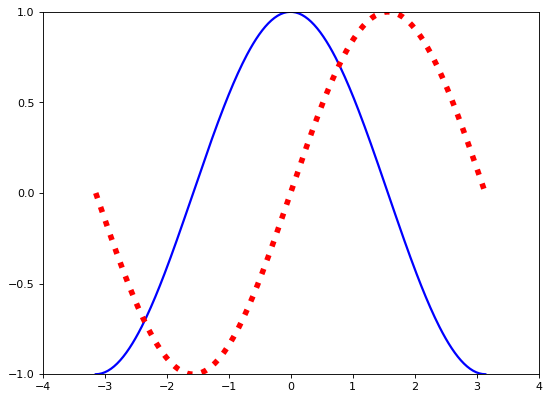

In [53]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

plt.figure( figsize=(8, 6), dpi=80 ) # размер 8x6 дюйма, 80 точек на дюйм
plt.subplot( 1, 1, 1 )               # новый график на сетке 1x1

X = np.linspace( -np.pi, np.pi, 256, endpoint=True ) 
C, S = np.cos(X), np.sin(X) 

# рисуем косинус синей сплошной линией шириной 2 пикселя 
plt.plot( X, C, color="blue", linewidth=2.0, linestyle="-" ) 
# рисуем синус красными точками шириной 5 пикселей 
plt.plot( X, S, color="red", linewidth=5.0, linestyle=":" ) 

plt.xlim( -4.0, 4.0 )                              # пределы оси x  
plt.xticks( np.linspace(-4, 4, 9, endpoint=True) ) # метки на оси x 
plt.ylim( -1.0, 1.0 )                              # пределы оси y
plt.yticks( np.linspace(-1, 1, 5, endpoint=True) );# метки на оси y

# plt.savefig('plot0.png', dpi=72) # сохранение в файл 72 точки на дюйм

Используем Matplotlib с настройкой меток осей и легендой:

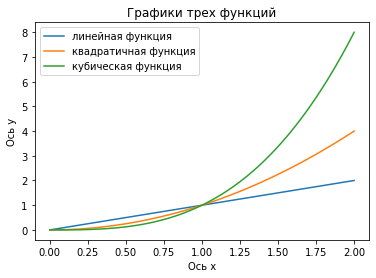

In [54]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='линейная функция') 
plt.plot(x, x**2, label='квадратичная функция') 
plt.plot(x, x**3, label='кубическая функция')
plt.xlabel('Ось x') 
plt.ylabel('Ось y')
plt.title('Графики трех функций')
plt.legend();

Используем Matplotlib для визуализации набора данных со сниженной размерностью (разными цветами):

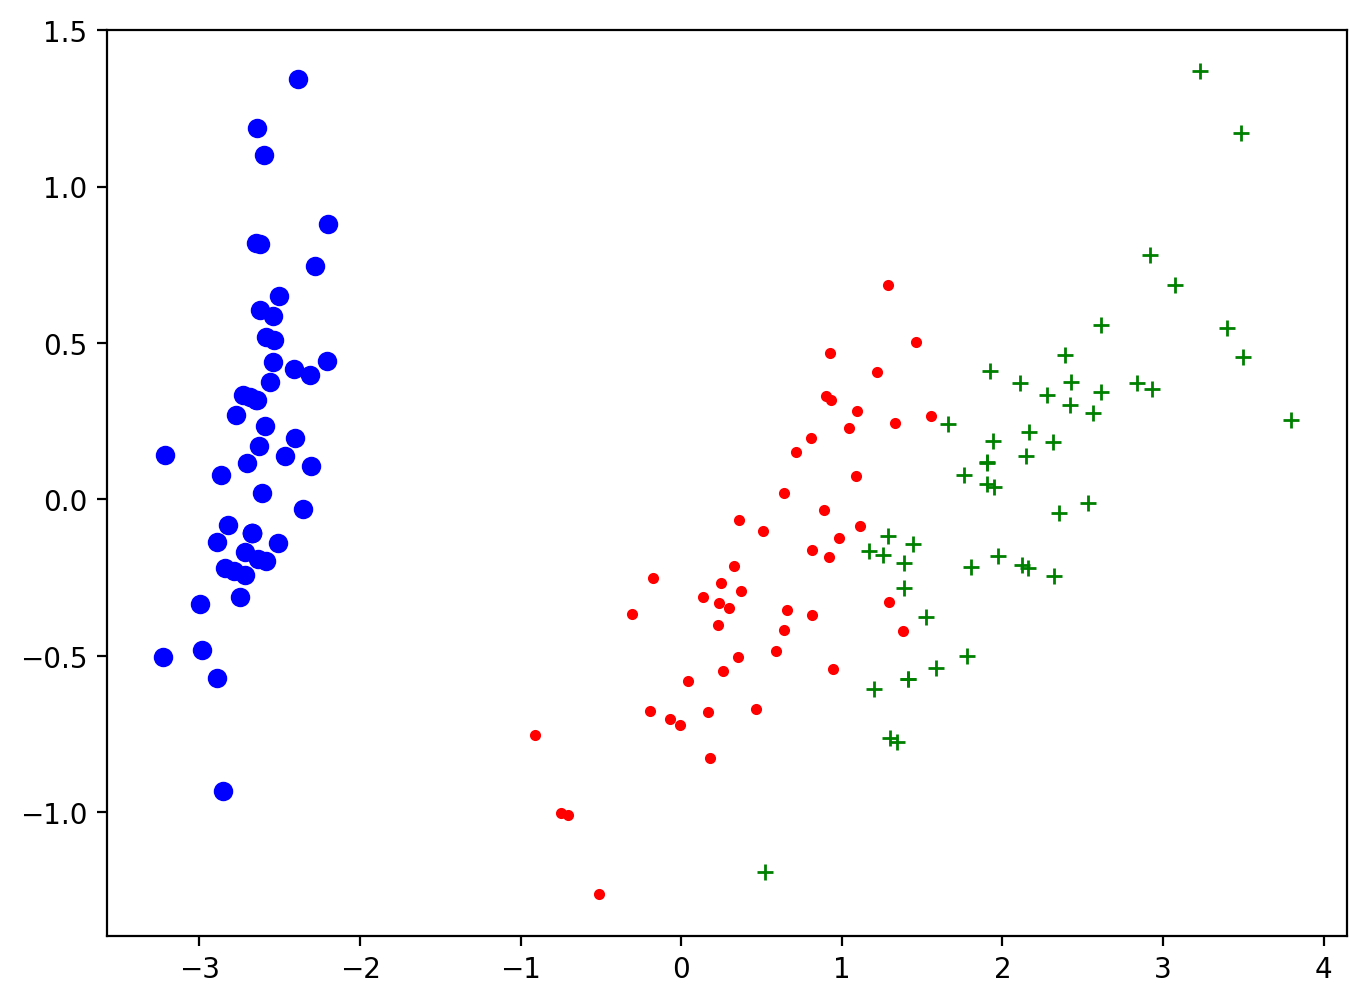

In [55]:
from urllib.request import urlopen
from contextlib import closing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
with closing(urlopen(url)) as u, open("iris.csv", "w") as f:
    f.write(u.read().decode())

data = np.genfromtxt( "iris.csv", delimiter=",", usecols=(0,1,2,3) ) 
target = np.genfromtxt( "iris.csv", delimiter=",", usecols=(4), dtype=str )

pca = PCA(n_components=2)
pcad = pca.fit_transform( data )

plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(pcad[target=="Iris-setosa",0],pcad[target=="Iris-setosa",1],"bo") 
plt.plot(pcad[target=="Iris-versicolor",0],pcad[target=="Iris-versicolor",1],"r.") 
plt.plot(pcad[target=="Iris-virginica",0],pcad[target=="Iris-virginica",1],"g+");

### Задание на лабораторную работу №2

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. 

2. Проведите исследование набора данных, выявляя числовые признаки. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. 

3. Определите признак, содержащий метку класса. Определите числовой признак, имеющий максимальную дисперсию.

4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.

5. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. 

6. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 99%.

7. Пользуясь методом главных компонент, снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами.